In [99]:
using MAT
using PyPlot
using Seaborn
using ProgressMeter
include("megamap.jl")

simulate (generic function with 1 method)

In [5]:
function convToJulia(arr)
    if length(arr) == 0
        return Vector{Float64}()
    elseif length(arr) == 1
        return [arr]
    else
        return Vector{Float64}(arr[:,1])
    end
end

convToJulia (generic function with 1 method)

In [197]:
predictedW = matread("../clusterResults/fittedW_1dm_grid_small_s.mat");
#predictedW = matread("../clusterResults/fittedW_1m_grid.mat");

In [198]:
vars = matread("../place_field_data.mat")
placeCenters = convToJulia.(vars["PF_centers"])[:,1];

In [199]:
targetMap = TargetMap(placeCenters; placeWidth=50.0);

In [200]:
W = predictedW["fittedW"]
forwardMap = ForwardMap(targetMap.fPeak, targetMap.inhibThres, targetMap.wI, W);

In [201]:
target = fTarget(50, targetMap);
inp = input(50, targetMap);
fPerStep = simulate(forwardMap, inp; timesteps=1500)
convergance = [sum((fPerStep[t,:] .- target).^2) for t=1:1500];

In [187]:
Seaborn.set_context("talk")
Seaborn.set_style("white")

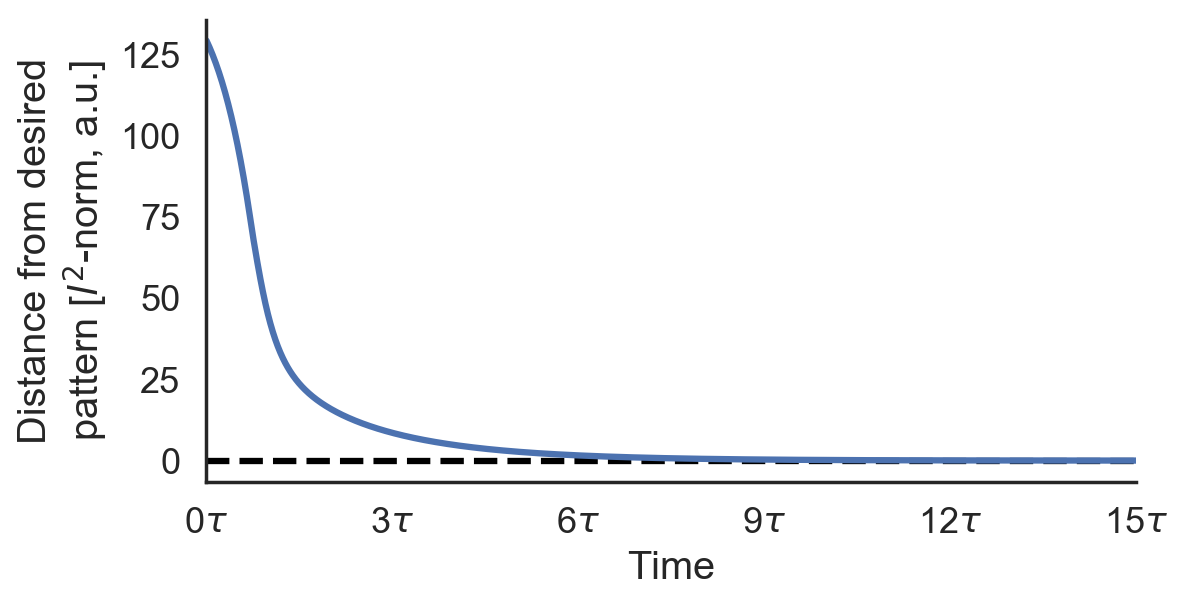

In [195]:
figure(figsize=(6,3), dpi=200)
axhline(0,c="k", ls="--")
plot((1:1500)*0.01, sqrt.(convergance))# ./ maximum(convergance))
xlim(0,15)
xticks(0:3:15, ["$(i)\$\\tau\$" for i=0:3:15])
xlabel("Time")
ylabel("Distance from desired\npattern [\$l^2\$-norm, a.u.]")

Seaborn.seaborn[:despine]()

In [203]:
endConvergence = Vector{Float64}()
@showprogress 1 "Simulating..." for x=0:5:4000
    target = fTarget(x, targetMap);
    inp = input(x, targetMap);
    fPerStep = simulate(forwardMap, inp; timesteps=1500)
    #convergance = [sum((fPerStep[t,:] .- target).^2) for t=1:700];
    push!(endConvergence, sum((fPerStep[end,:] .- target).^2))
end

Simulating...100%|██████████████████████████████████████| Time: 0:13:44


In [204]:
Seaborn.set_context("talk")
Seaborn.set_style("white")

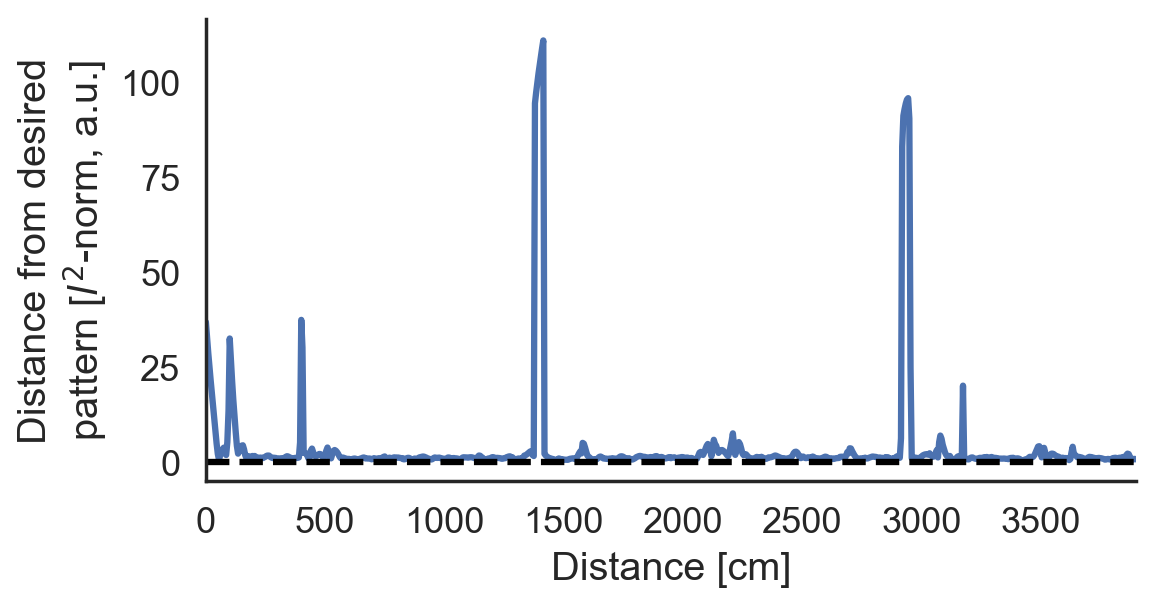

In [208]:
figure(figsize=(6,3), dpi=200)
plot(0:5:4000, sqrt.(endConvergence));
xlabel("Distance [cm]")
ylabel("Distance from desired\npattern [\$l^2\$-norm, a.u.]")
#ylim(0,15000)
xlim(0,3900)
#for ep = predictedW["evaluationPoints"]
#    axvline(ep, c="k", alpha=.5, lw=1)
#end
axhline(0, c="k", ls="--")
Seaborn.seaborn[:despine]()

In [211]:
extrema(W)

(-0.00989749360837316, 0.010625476345295586)

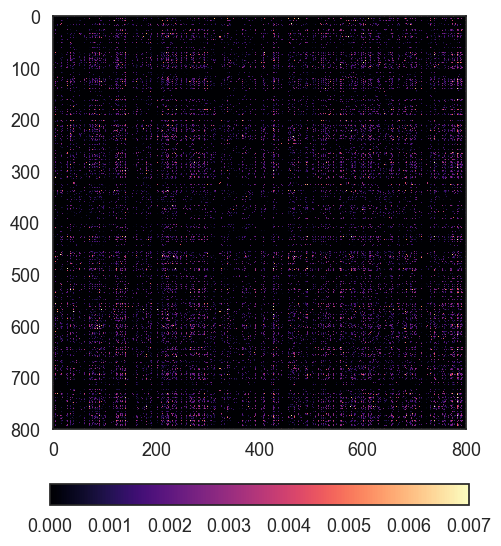

PyObject <matplotlib.colorbar.Colorbar object at 0x7f8cd9086d10>

In [231]:
imshow(forwardMap.W, cmap="magma", vmin=0.0, vmax=0.007)
colorbar(orientation="horizontal", shrink=0.52, pad=0.1)#, )